In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import pytz

In [247]:
df1 = pd.read_csv('Mburicao_10_05_2022_10min.csv')
df2 = pd.read_csv('Precipitaciones_AISP_10min.csv')
df3 = pd.read_csv('Precipitaciones_SND_10min.csv')



In [248]:
# Filtrar los datos desde el 24 de mayo de 2021 hasta el 1 de septiembre de 2021
start_date = '2021-05-24'
end_date = '2021-09-01'
df_filtered = df_new.loc[start_date:end_date]

# Graficar el DataFrame df_filtered en función del tiempo
plt.figure(figsize=(12, 6))
plt.plot(df_filtered.index, df_filtered['nivel'], color='b', linestyle='-')
plt.title('Gráfico de nivel del arroyo en función del tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Nivel')
plt.grid(True)
plt.show()

,nivel
Fecha,
2021-05-24 17:50:00-04:00,0.097351
2021-05-24 18:00:00-04:00,0.082633
2021-05-24 18:10:00-04:00,0.058515
2021-05-24 18:20:00-04:00,0.128404
2021-05-24 18:30:00-04:00,0.119611


In [249]:
df2_copy = df2.copy() # Realiza una copia del dataframe original de la precipitacion el aeropuerto
df2_copy['Fecha'] = pd.to_datetime(df2_copy['Fecha'], format='%m/%d/%Y %H:%M') # Conversión de la columna fecha a datetime
df2_copy.set_index('Fecha', inplace = True) # Coloca fecha como indice
##########################
df2_copy.index = df2_copy.index.tz_localize('utc').tz_convert('America/Asuncion')

########################
datos_AISP = df2_copy['Precipitaciones'] # Toma los datos de niveles de asunción
#datos_mbu = datos_asu.interpolate(limit = 35, method = 'quadratic', limit_direction = 'both') # Interpolación de los datos faltantes de asunción 
df_AISP = pd.DataFrame(datos_AISP) # Crea un dataset con los datos de asunción procesados
df_AISP.columns = ['Precipitacion_AISP_mm'] # Nombra la columna del dataset como 'nivel'
df_AISP.head()

,Precipitacion_AISP_mm
Fecha,
2021-05-24 13:50:00-04:00,0.0
2021-05-24 14:00:00-04:00,0.0
2021-05-24 14:10:00-04:00,0.0
2021-05-24 14:20:00-04:00,0.0
2021-05-24 14:30:00-04:00,0.0


In [250]:
valor = df_AISP.loc['2021-07-15 04:40']
valor

Precipitacion_AISP_mm    2.0
Name: 2021-07-15 04:40:00-04:00, dtype: float64

In [251]:
df3_copy = df3.copy() # Realiza una copia del dataframe original de la precipitacion SND
df3_copy['Fecha'] = pd.to_datetime(df3_copy['Fecha'], format='%m/%d/%Y %H:%M') # Conversión de la columna fecha a datetime
df3_copy.set_index('Fecha', inplace = True) # Coloca fecha como indice
#############################################
df3_copy.index = df3_copy.index.tz_localize('utc').tz_convert('America/Asuncion')
#################################################

datos_SND = df3_copy['Precipitaciones'] # Toma los datos de niveles de asunción
#datos_mbu = datos_asu.interpolate(limit = 35, method = 'quadratic', limit_direction = 'both') # Interpolación de los datos faltantes de asunción 
df_SND = pd.DataFrame(datos_SND) # Crea un dataset con los datos de asunción procesados
df_SND.columns = ['Precipitacion_SND_mm'] # Nombra la columna del dataset como 'nivel'
df_SND.head()

,Precipitacion_SND_mm
Fecha,
2021-05-24 13:50:00-04:00,0.0
2021-05-24 14:00:00-04:00,0.0
2021-05-24 14:10:00-04:00,0.0
2021-05-24 14:20:00-04:00,0.0
2021-05-24 14:30:00-04:00,0.0


In [252]:
valor = df_SND.loc['2021-07-15 04:40']
valor

Precipitacion_SND_mm    1.6
Name: 2021-07-15 04:40:00-04:00, dtype: float64

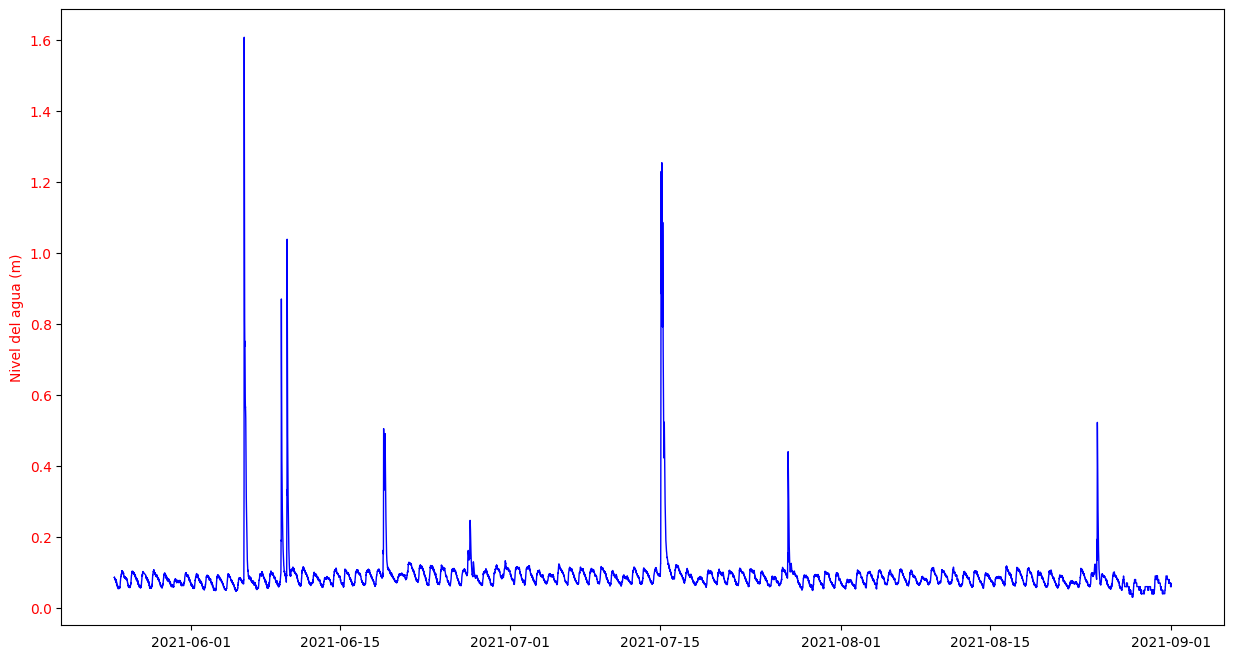

In [283]:
start_date = '2021-05-24 20:00'
end_date = '2021-08-31 23:50'
df_filtered_new = df_new.loc[start_date:end_date]
fig, ax1 = plt.subplots(figsize=(15, 8))
# Primer gráfico: Nivel del agua (eje y principal)
ax1.plot(df_filtered_new.index, df_filtered_new['nivel'], marker='', linestyle='-', color='b', linewidth=1, label='Nivel del agua')
ax1.set_ylabel('Nivel del agua (m)', color='r')
ax1.tick_params(axis='y', labelcolor='r')

plt.show()

In [274]:
def plot_water_level_and_precipitation(start_date, end_date, df_new, df_SND, df_AISP):
    # Filtrar los datos según el rango de fechas
    df_filtered_new = df_new.loc[start_date:end_date]
    df_filtered_SND = df_SND.loc[start_date:end_date]
    df_filtered_SP = df_AISP.loc[start_date:end_date]

    

    fig, ax1 = plt.subplots(figsize=(15, 8))

    # Primer gráfico: Nivel del agua (eje y principal)
    ax1.plot(df_filtered_new.index, df_filtered_new['nivel'], marker='', linestyle='-', color='r', linewidth=1.3, label='Nivel del agua')
    ax1.set_ylabel('Nivel del agua (m)', color='r')
    ax1.tick_params(axis='y', labelcolor='r')

    # Segundo eje y: Precipitación SND y Precipitación AISP
    ax2 = ax1.twinx()
    ax2.plot(df_filtered_SND.index, df_filtered_SND['Precipitacion_SND_mm'], marker='', linestyle='-', color='b', linewidth=1, label='Precipitación SND')
    ax2.plot(df_filtered_SP.index, df_filtered_SP['Precipitacion_AISP_mm'], marker='', linestyle='-', color='g', linewidth=1, label='Precipitación AISP')
    ax2.set_ylabel('Precipitación (mm)', color='b')  # Se puede usar solo un color ya que comparten el mismo eje
    ax2.tick_params(axis='y', labelcolor='b')

    # Formatear el eje x para mostrar las fechas claramente
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M' + ' Hs'))  # Formato: hora:minuto
    ax1.xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Mostrar cada hora
    fig.autofmt_xdate(rotation=30, ha='center')  # Rotar las etiquetas de fecha para que no se superpongan demasiado

    # Agregar título al gráfico
    plt.title('Nivel del agua y Precipitación')

    # Agregar leyenda fuera del área del gráfico
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper right')



    # Ajustar los márgenes y mostrar la figura
    plt.tight_layout()
    plt.show()

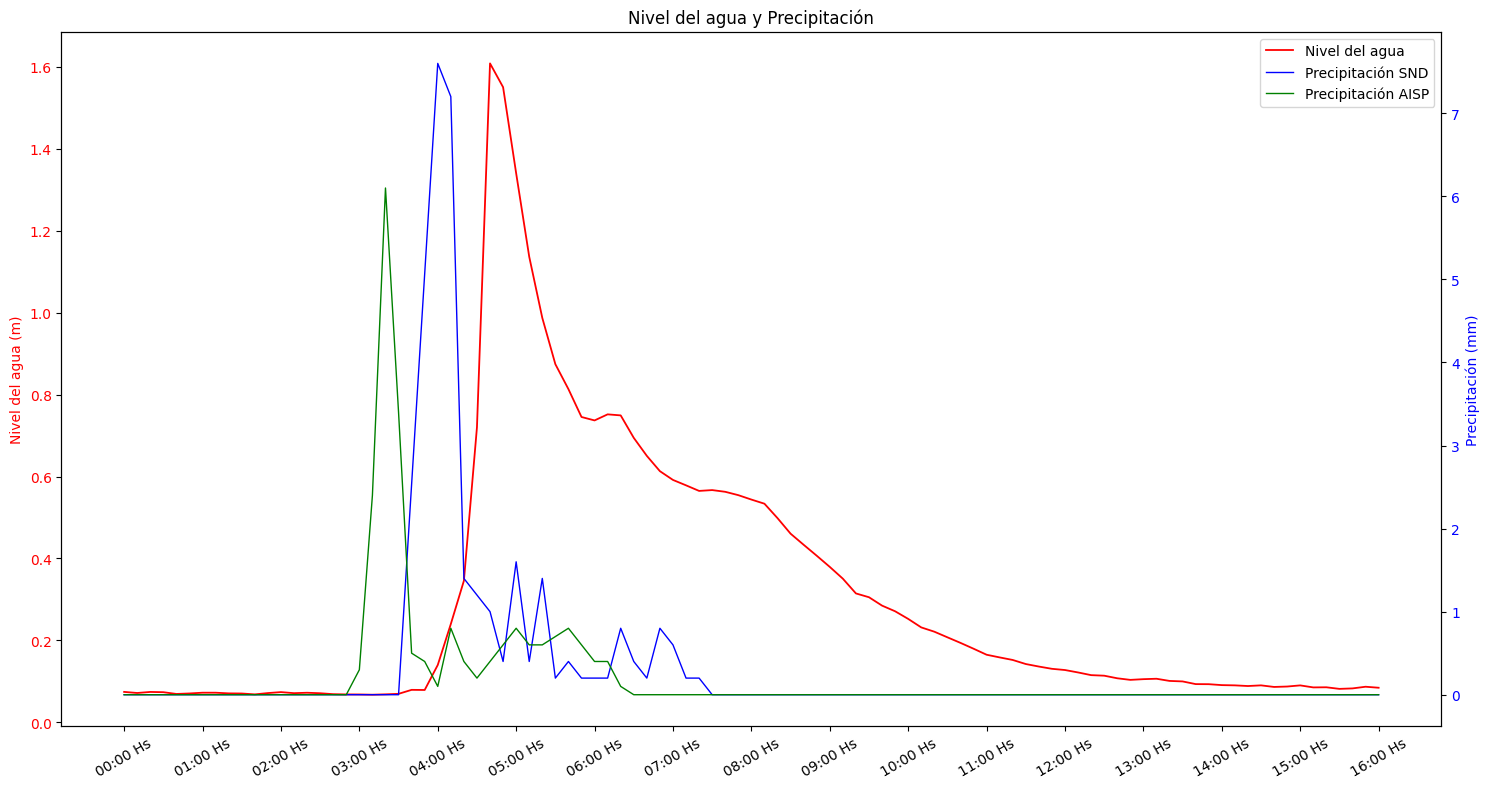

In [275]:
start_date = '2021-06-5 20:00'
end_date = '2021-06-6 12:00'
plot_water_level_and_precipitation(start_date, end_date, df_new, df_SND, df_AISP)

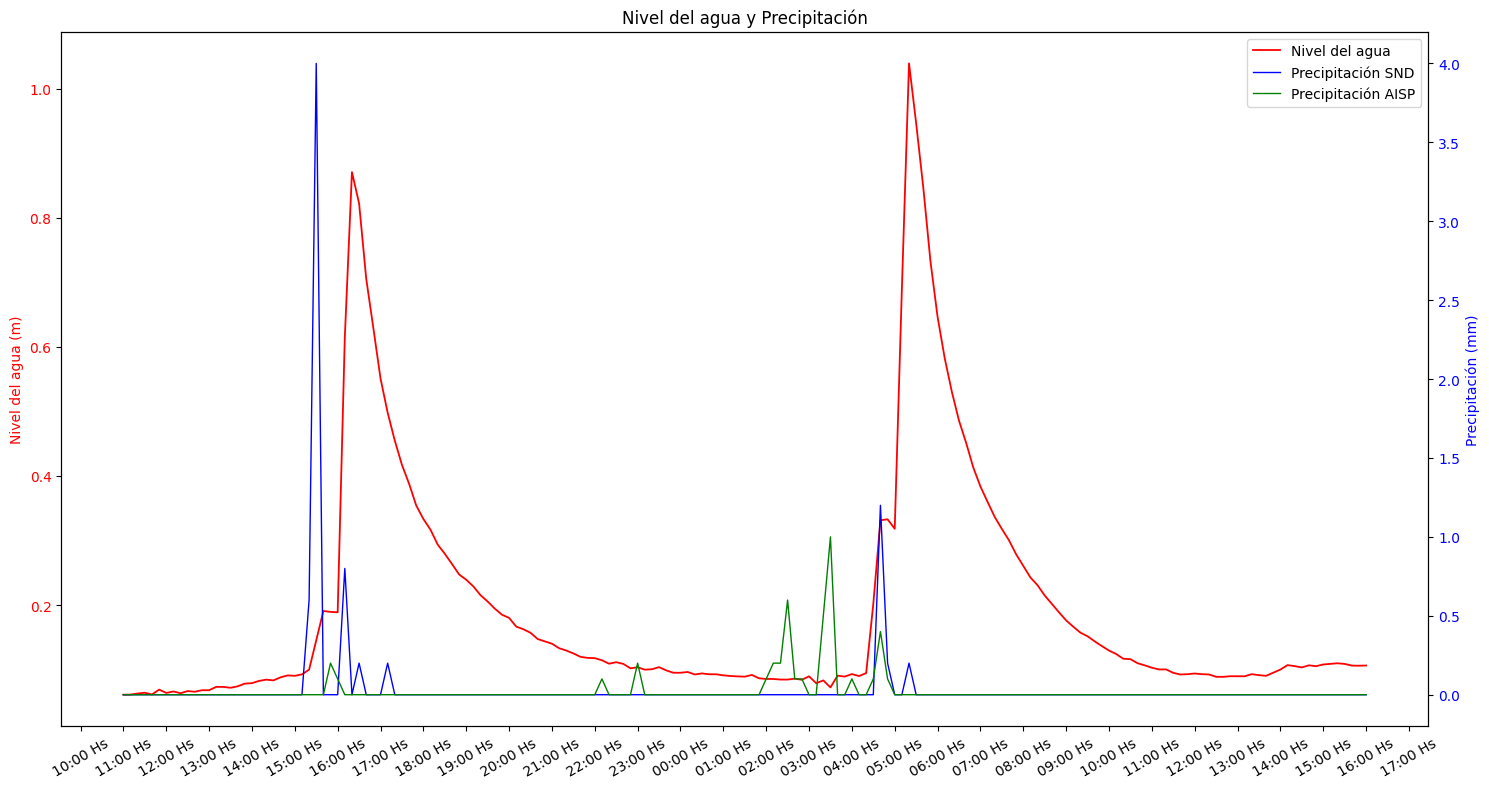

In [256]:
# Llamada a la función con las fechas especificadas y los DataFrames correspondientes
start_date = '2021-06-9 07:00'
end_date = '2021-06-10 12:00'
plot_water_level_and_precipitation(start_date, end_date, df_new, df_SND, df_AISP)

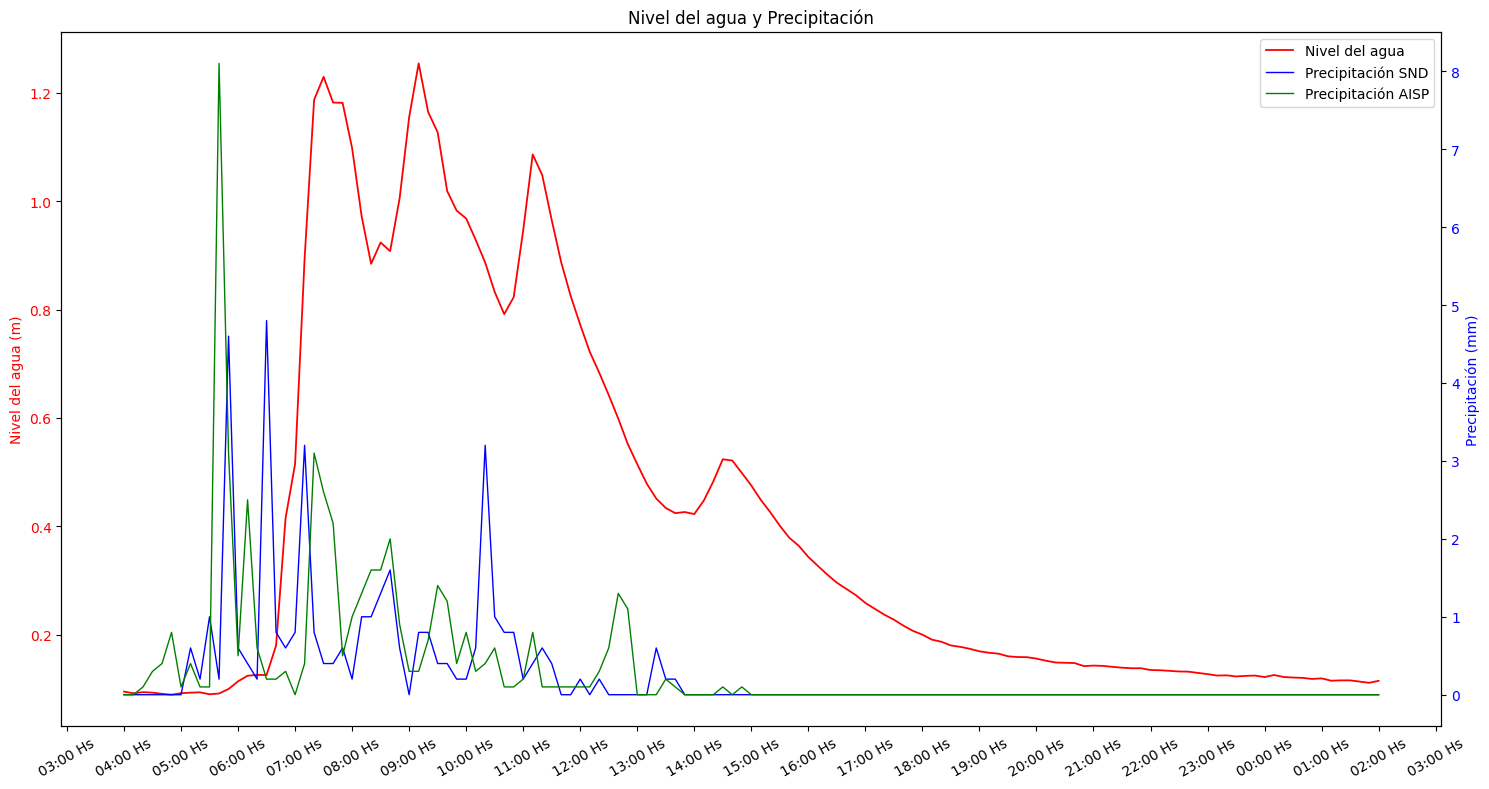

In [257]:
# Seleccionar el rango de fechas
start_date = '2021-07-15 00:00'
end_date = '2021-07-15 22:00'
plot_water_level_and_precipitation(start_date, end_date, df_new, df_SND, df_AISP)

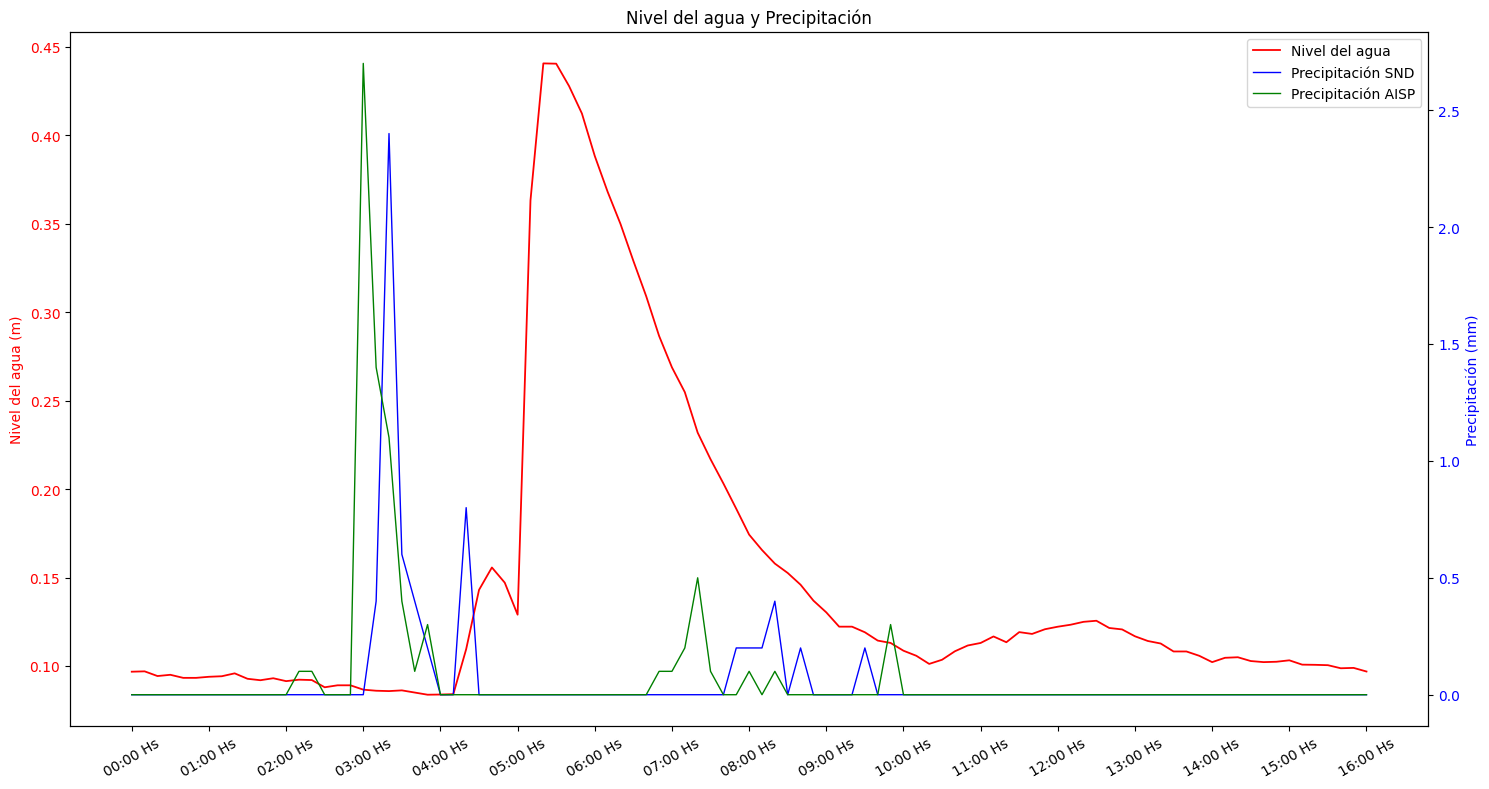

In [258]:
start_date = '2021-07-26 20:00'
end_date = '2021-07-27 12:00'
plot_water_level_and_precipitation(start_date, end_date, df_new, df_SND, df_AISP)

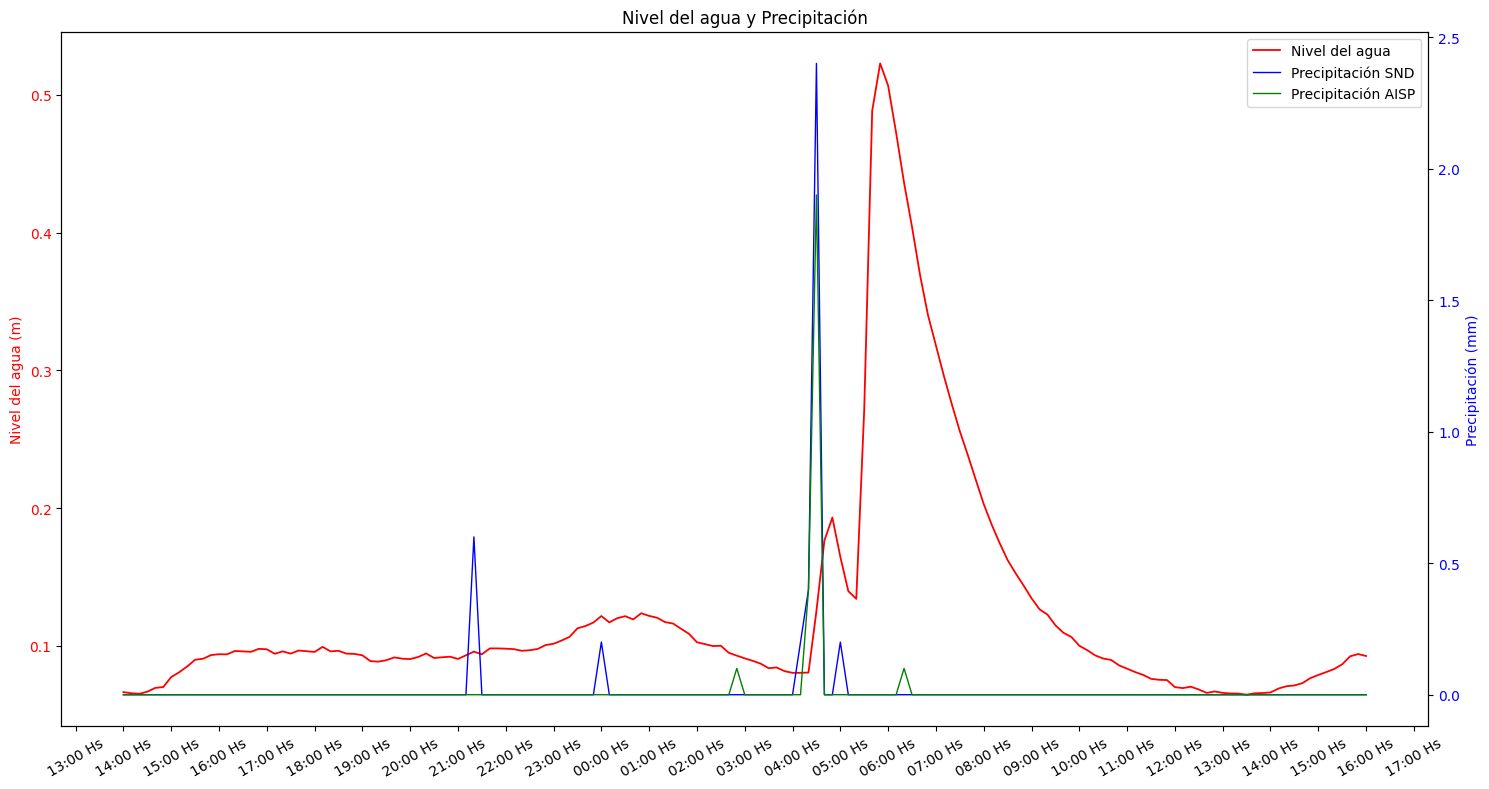

In [259]:
start_date = '2021-08-24 10:00'
end_date = '2021-08-25 12:00'
plot_water_level_and_precipitation(start_date, end_date, df_new, df_SND, df_AISP)